In [5]:
# Import Packages
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Set seeds for reproducibility
def set_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)

set_seed(42)

sns.set_style("whitegrid")

## Basic Information

In [3]:
data = pd.read_csv('./mbti_1.csv')
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [18]:
data.describe(include='O')

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [19]:
data['type'].value_counts()

type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [21]:
print(data['posts'][0])

'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|

## EDA

#### URL count per user in raw post

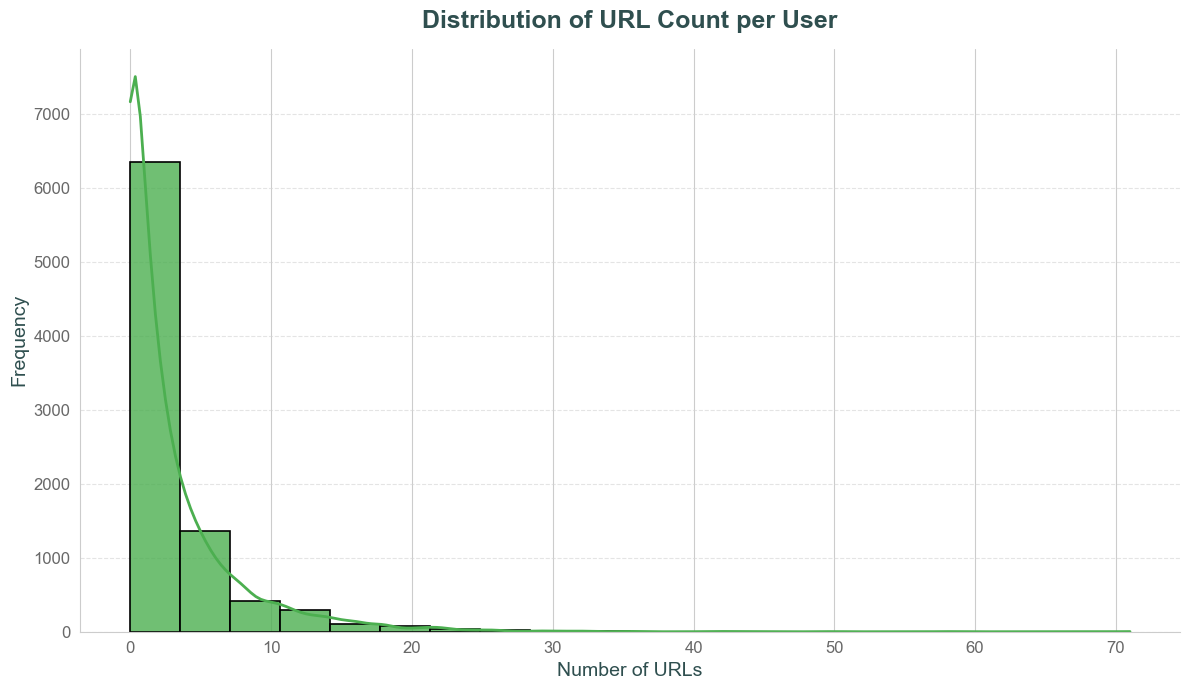

In [22]:
data['url_count'] = data['posts'].str.count(r'http\S+|www\S+|https\S+')

sns.set_style("whitegrid")

primary_color = '#4CAF50'

plt.figure(figsize=(12, 7))

sns.histplot(
    data['url_count'],
    bins=20,
    kde=True,
    color=primary_color,
    edgecolor='black',
    linewidth=1.2,
    alpha=0.8,
    line_kws={'linewidth': 2, 'color': '#2E8B57'}
)

plt.title(
    'Distribution of URL Count per User',
    fontsize=18,
    fontweight='bold',
    color='darkslategray',
    pad=15
)
plt.xlabel(
    'Number of URLs',
    fontsize=14,
    color='darkslategray'
)
plt.ylabel(
    'Frequency',
    fontsize=14,
    color='darkslategray'
)

plt.xticks(fontsize=12, color='dimgray')
plt.yticks(fontsize=12, color='dimgray')

sns.despine(top=True, right=True)

plt.grid(axis='y', linestyle='--', alpha=0.6, color='lightgray')

plt.tight_layout()
plt.show()

#### Type distribution

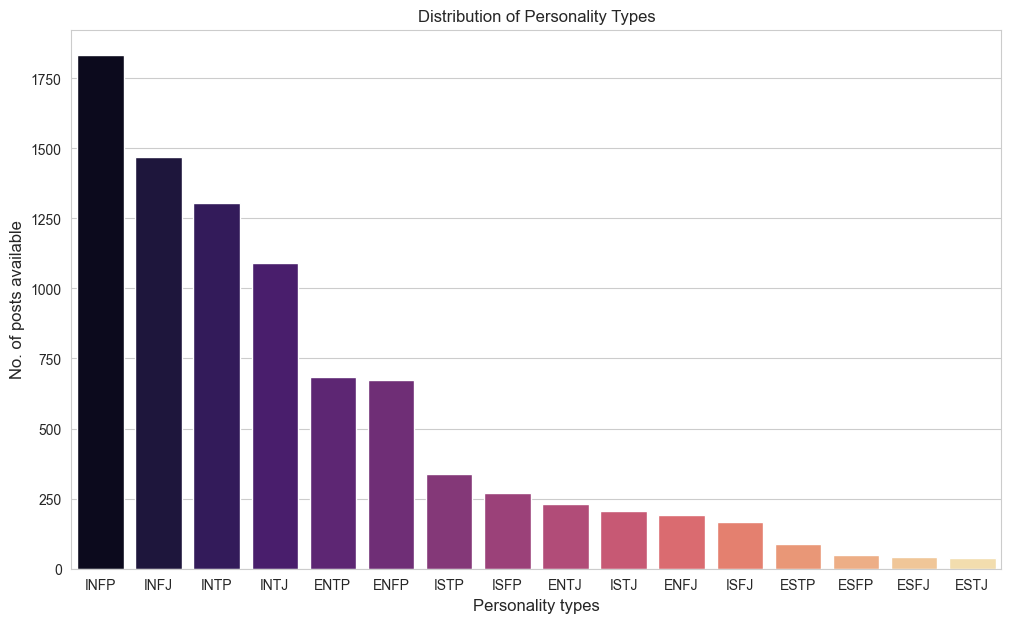

In [23]:
# Plotting this in descending order for better understanding of this visualization
type_count = data['type'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(
    x=type_count.index,
    y=type_count.values,
    hue=type_count.index,  # Set hue to x variable
    palette="magma",
    legend=False
)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts available', fontsize=12)
plt.title('Distribution of Personality Types')
plt.show()

#### Turn dimension into column and plot distribution

In [24]:
data['I/E'] = data['type'].apply(lambda x: x[0] == 'I')
data['S/N'] = data['type'].apply(lambda x: x[1] == 'S')
data['T/F'] = data['type'].apply(lambda x: x[2] == 'T')
data['P/J'] = data['type'].apply(lambda x: x[3] == 'P')

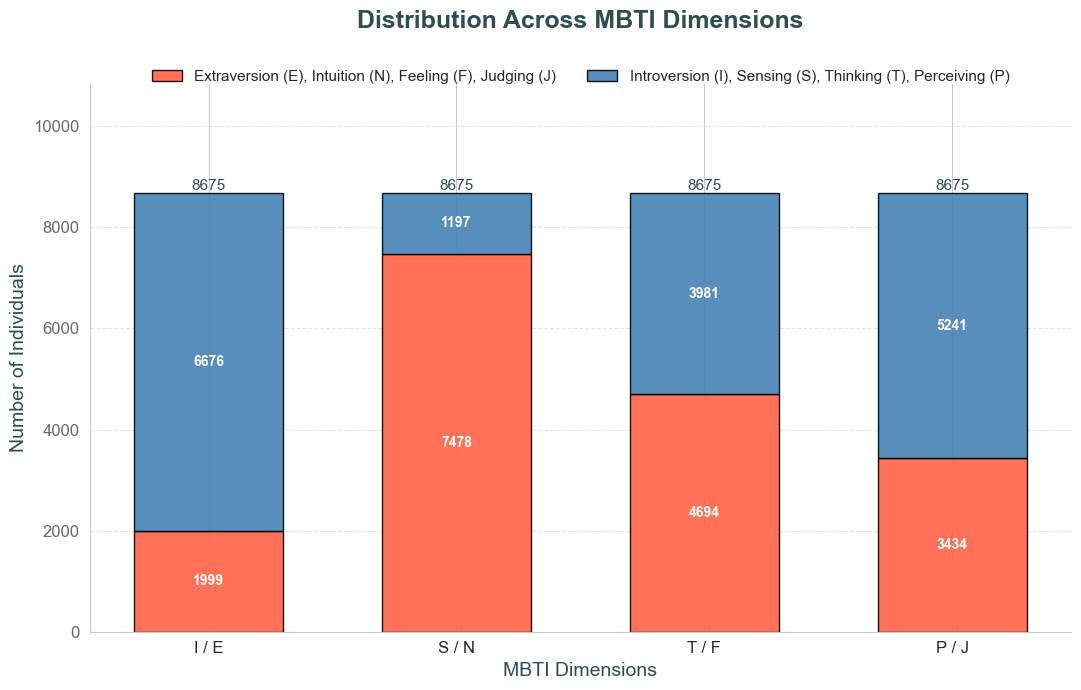

In [25]:
bottom_counts = (
    data['I/E'].value_counts().get(False, 0),  # E
    data['S/N'].value_counts().get(False, 0),  # N
    data['T/F'].value_counts().get(False, 0),  # F
    data['P/J'].value_counts().get(False, 0),  # J
)

top_counts = (
    data['I/E'].value_counts().get(True, 0),   # I
    data['S/N'].value_counts().get(True, 0),   # S
    data['T/F'].value_counts().get(True, 0),   # T
    data['P/J'].value_counts().get(True, 0),   # P
)

# 2. Position and width
N = 4
ind = np.arange(N) # The x locations for the groups
width = 0.6

# 3. Set a professional Seaborn style
sns.set_style("whitegrid")

# 4. Define custom, appealing colors
bottom_color = "#FF6347" # A vibrant coral/tomato red for the 'False' group
top_color = "#4682B4"    # A distinct steel blue for the 'True' group

# 5. Plotting with enhanced figure size and aesthetics
plt.figure(figsize=(11, 7))

p1 = plt.bar(ind, bottom_counts, width, label="Extraversion (E), Intuition (N), Feeling (F), Judging (J)", color=bottom_color, edgecolor='black', alpha=0.9)
p2 = plt.bar(ind, top_counts, width, bottom=bottom_counts, label="Introversion (I), Sensing (S), Thinking (T), Perceiving (P)", color=top_color, edgecolor='black', alpha=0.9)

# 6. Formatting and adding annotations
plt.title('Distribution Across MBTI Dimensions', fontsize=18, fontweight='bold', color='darkslategray', pad=40) # Increased pad for more space
plt.ylabel('Number of Individuals', fontsize=14, color='darkslategray')
plt.xlabel('MBTI Dimensions', fontsize=14, color='darkslategray')
plt.xticks(ind, ['I / E', 'S / N', 'T / F', 'P / J'], fontsize=12)
plt.yticks(fontsize=12, color='dimgray')

# Add values on top of the bars for both segments
for i in range(N):
    total_height = bottom_counts[i] + top_counts[i]
    # Annotate bottom segment
    if bottom_counts[i] > 0:
        plt.text(ind[i], bottom_counts[i] / 2, str(bottom_counts[i]),
                 ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    # Annotate top segment
    if top_counts[i] > 0:
        plt.text(ind[i], bottom_counts[i] + top_counts[i] / 2, str(top_counts[i]),
                 ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    # Annotate total height above each stacked bar
    plt.text(ind[i], total_height + 5, str(total_height),
             ha='center', va='bottom', color='darkslategray', fontsize=11)

# MODIFICATION: Adjust y-axis limit to create space for the legend
max_height = max([b + t for b, t in zip(bottom_counts, top_counts)])
plt.ylim(0, max_height * 1.25) # Increase top y-limit by 25% to make room

# MODIFICATION: Move legend to the space between the title and the bars
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
           ncol=2, frameon=False, fontsize=11) # Place legend above the plot area

# Remove top and right spines for a cleaner look
sns.despine(top=True, right=True)

# Add a subtle grid for better readability (y-axis only)
plt.grid(axis='y', linestyle='--', alpha=0.6, color='lightgray')

plt.tight_layout()
plt.show()

#### URL count by dimension

In [26]:
# Average URL count for I vs E
avg_ie = data.groupby('I/E')['url_count'].mean()
print(f"Average URL Count - Extrovert (E): {avg_ie[False]:.2f}, Introvert (I): {avg_ie[True]:.2f}")

# Average URL count for S vs N
avg_sn = data.groupby('S/N')['url_count'].mean()
print(f"Average URL Count - Intuition (N): {avg_sn[False]:.2f}, Sensing (S): {avg_sn[True]:.2f}")

# Average URL count for T vs F
avg_tf = data.groupby('T/F')['url_count'].mean()
print(f"Average URL Count - Feeling (F): {avg_tf[False]:.2f}, Thinking (T): {avg_tf[True]:.2f}")

# Average URL count for P vs J
avg_pj = data.groupby('P/J')['url_count'].mean()
print(f"Average URL Count - Judging (J): {avg_pj[False]:.2f}, Perceiving (P): {avg_pj[True]:.2f}")


Average URL Count - Extrovert (E): 2.36, Introvert (I): 3.07
Average URL Count - Intuition (N): 2.88, Sensing (S): 3.11
Average URL Count - Feeling (F): 2.98, Thinking (T): 2.83
Average URL Count - Judging (J): 2.75, Perceiving (P): 3.02


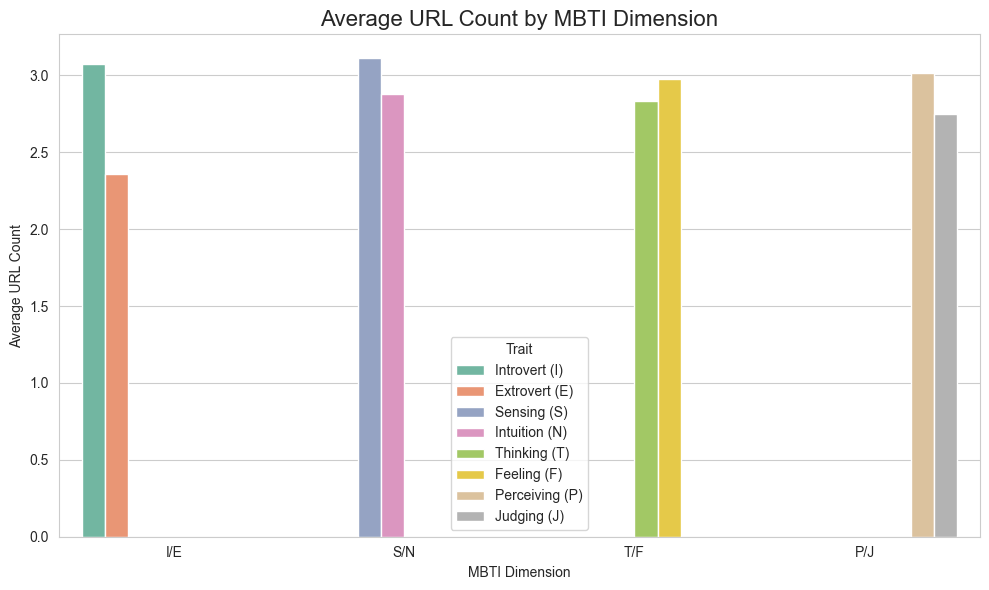

In [27]:
# Create a DataFrame to hold average url counts for each trait
dimension_averages = {
    'I/E': {'Introvert (I)': data[data['I/E']]['url_count'].mean(),
            'Extrovert (E)': data[~data['I/E']]['url_count'].mean()},
    
    'S/N': {'Sensing (S)': data[data['S/N']]['url_count'].mean(),
            'Intuition (N)': data[~data['S/N']]['url_count'].mean()},
    
    'T/F': {'Thinking (T)': data[data['T/F']]['url_count'].mean(),
            'Feeling (F)': data[~data['T/F']]['url_count'].mean()},
    
    'P/J': {'Perceiving (P)': data[data['P/J']]['url_count'].mean(),
            'Judging (J)': data[~data['P/J']]['url_count'].mean()},
}

# Convert to long-form DataFrame for seaborn
plot_data = []
for dim, traits in dimension_averages.items():
    for trait, avg in traits.items():
        plot_data.append({'Dimension': dim, 'Trait': trait, 'Avg_URL_Count': avg})

plot_df = pd.DataFrame(plot_data)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Dimension', y='Avg_URL_Count', hue='Trait', palette='Set2')

plt.title('Average URL Count by MBTI Dimension', fontsize=16)
plt.ylabel('Average URL Count')
plt.xlabel('MBTI Dimension')
plt.legend(title='Trait')
plt.tight_layout()
plt.show()


#### Remove URL and speical character

In [28]:
import re

def clean_posts_and_count_urls(row):
    raw_posts = row['posts'].split('|||')
    cleaned_posts = []
    pure_url_count = 0
    
    for post in raw_posts:
        # Remove URLs
        no_url = re.sub(r'http\S+|www\S+|https\S+', '', post)

        # Clean special characters (keep basic punctuation)
        cleaned = re.sub(r'[^A-Za-z0-9\s.,!?\'\"-]', '', no_url)
        cleaned = re.sub(r'\s+', ' ', cleaned).strip().strip('\'')

        if cleaned == '':
            # It's a pure-URL post
            pure_url_count += 1
        else:
            # Only keep non-empty posts
            cleaned_posts.append(cleaned)
    
    # Join valid posts with ||| (only between non-empty posts)
    cleaned_combined = '|||'.join(cleaned_posts)

    return pd.Series({
        'cleaned_posts': cleaned_combined,
        'pure_url_count': pure_url_count,
        'valid_post_count': len(cleaned_posts)
    })


# Apply to your DataFrame
cleaned_df = data.apply(clean_posts_and_count_urls, axis=1)

# Store results
data['cleaned_posts'] = cleaned_df['cleaned_posts']
data['pure_url_count'] = cleaned_df['pure_url_count']
data['valid_post_count'] = cleaned_df['valid_post_count']

#### Pure URL count

In [29]:
# Average Pure URL Count for I/E
avg_ie = data.groupby('I/E')['pure_url_count'].mean()
print(f"Pure URL Avg - Extrovert (E): {avg_ie[False]:.2f}, Introvert (I): {avg_ie[True]:.2f}")

# S/N
avg_sn = data.groupby('S/N')['pure_url_count'].mean()
print(f"Pure URL Avg - Intuition (N): {avg_sn[False]:.2f}, Sensing (S): {avg_sn[True]:.2f}")

# T/F
avg_tf = data.groupby('T/F')['pure_url_count'].mean()
print(f"Pure URL Avg - Feeling (F): {avg_tf[False]:.2f}, Thinking (T): {avg_tf[True]:.2f}")

# P/J
avg_pj = data.groupby('P/J')['pure_url_count'].mean()
print(f"Pure URL Avg - Judging (J): {avg_pj[False]:.2f}, Perceiving (P): {avg_pj[True]:.2f}")

Pure URL Avg - Extrovert (E): 0.99, Introvert (I): 1.49
Pure URL Avg - Intuition (N): 1.34, Sensing (S): 1.55
Pure URL Avg - Feeling (F): 1.41, Thinking (T): 1.32
Pure URL Avg - Judging (J): 1.29, Perceiving (P): 1.42


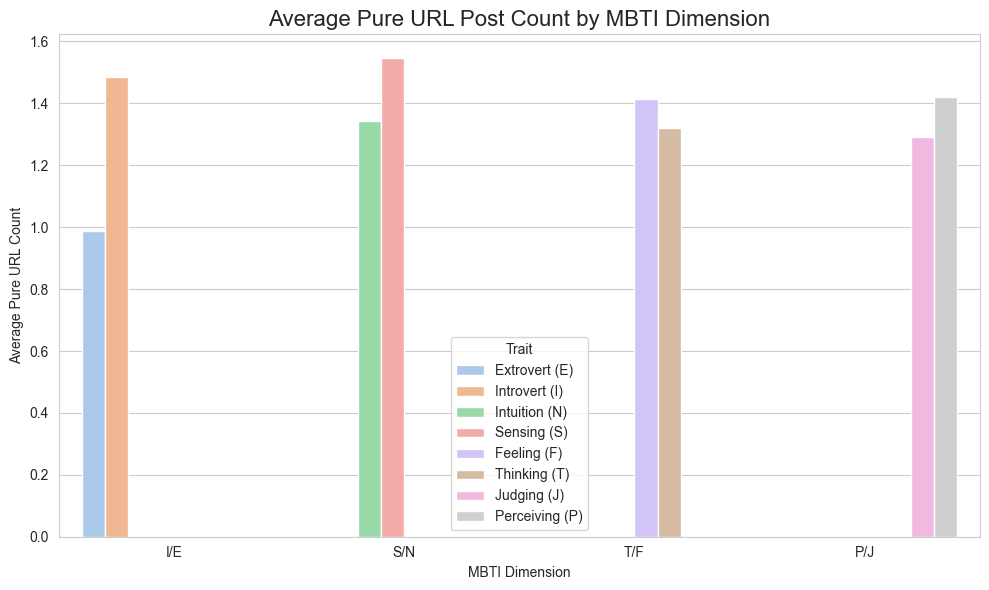

In [30]:
# Organize into long-form dataframe
plot_data = pd.DataFrame({
    'Dimension': ['I/E', 'I/E', 'S/N', 'S/N', 'T/F', 'T/F', 'P/J', 'P/J'],
    'Trait': ['Extrovert (E)', 'Introvert (I)', 'Intuition (N)', 'Sensing (S)',
              'Feeling (F)', 'Thinking (T)', 'Judging (J)', 'Perceiving (P)'],
    'Avg_Pure_URLs': [
        avg_ie[False], avg_ie[True],
        avg_sn[False], avg_sn[True],
        avg_tf[False], avg_tf[True],
        avg_pj[False], avg_pj[True]
    ]
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='Dimension', y='Avg_Pure_URLs', hue='Trait', palette='pastel')

plt.title('Average Pure URL Post Count by MBTI Dimension', fontsize=16)
plt.ylabel('Average Pure URL Count')
plt.xlabel('MBTI Dimension')
plt.legend(title='Trait')
plt.tight_layout()
plt.show()


In [2]:
data = pd.read_csv("mbti_cleaned.csv")

#### Post length and comment length

In [3]:
def compute_post_lengths(row):
    posts = row['cleaned_posts'].split('|||')
    
    word_counts = [len(post.split()) for post in posts if post.strip() != '']
    
    if len(word_counts) == 0:
        avg_len = 0
        total_len = 0
    else:
        avg_len = sum(word_counts) / len(word_counts)
        total_len = sum(word_counts)
    
    return pd.Series({
        'avg_post_length': avg_len,
        'total_post_length': total_len
    })

# Apply to the dataset
length_df = data.apply(compute_post_lengths, axis=1)

# Add to main dataframe
data['avg_post_length'] = length_df['avg_post_length']
data['total_post_length'] = length_df['total_post_length']

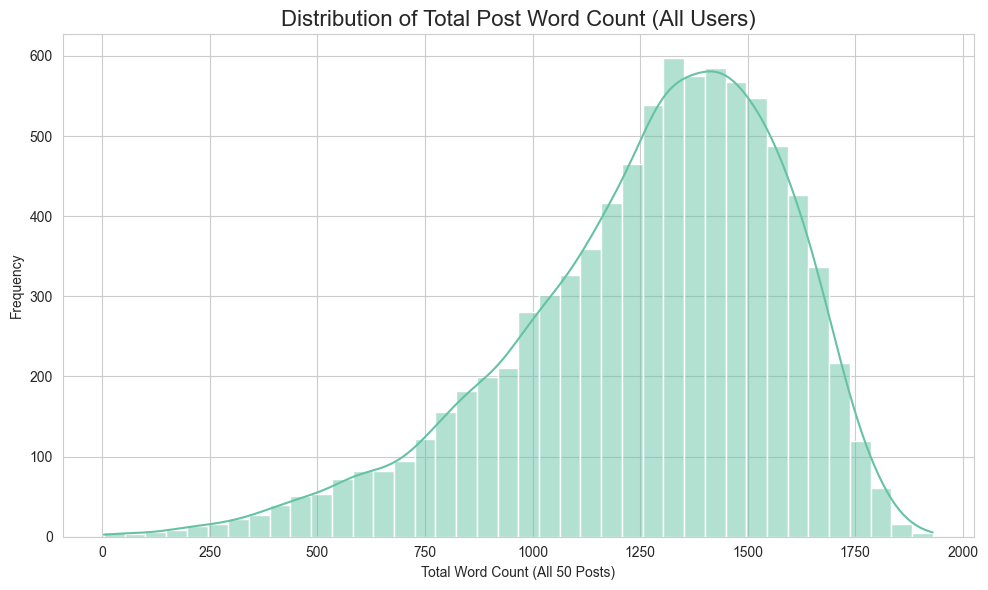

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['total_post_length'], bins=40, kde=True, color=sns.color_palette("Set2")[0])

plt.title('Distribution of Total Post Word Count (All Users)', fontsize=16)
plt.xlabel('Total Word Count (All 50 Posts)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

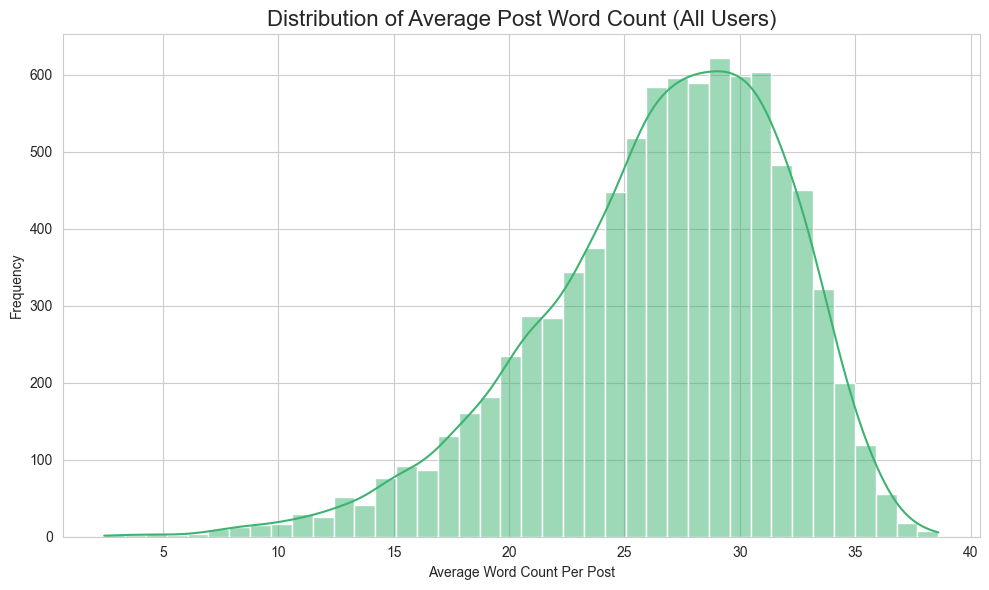

In [32]:
# Histogram of Average Post Length Across All Users
plt.figure(figsize=(10, 6))
sns.histplot(data['avg_post_length'], bins=40, kde=True, color='mediumseagreen')

plt.title('Distribution of Average Post Word Count (All Users)', fontsize=16)
plt.xlabel('Average Word Count Per Post')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

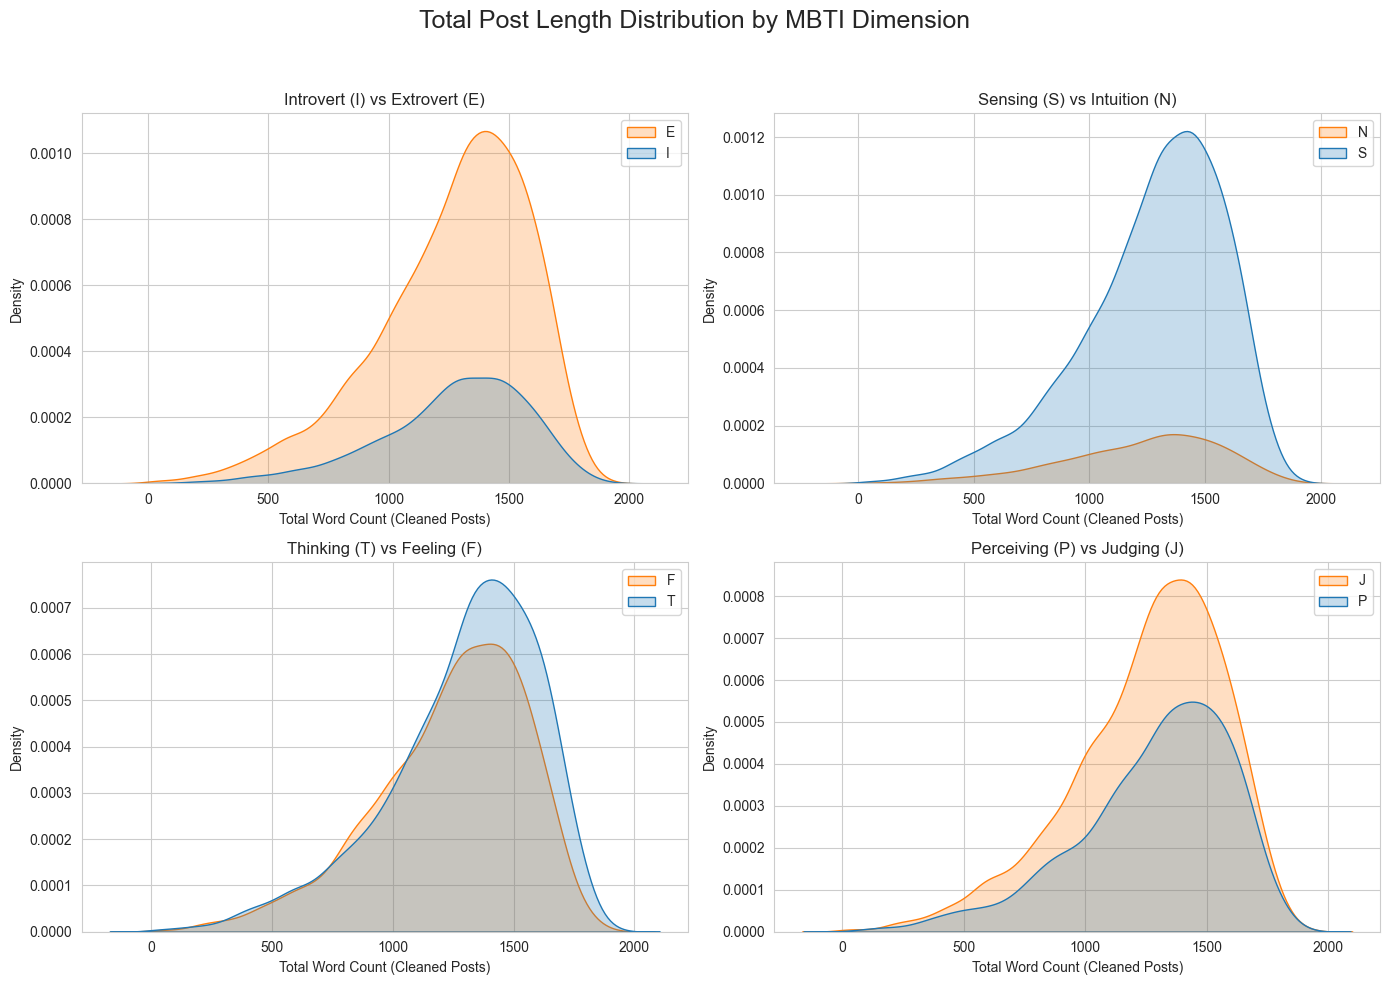

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Total Post Length Distribution by MBTI Dimension', fontsize=18)

# I/E
sns.kdeplot(data=data, x='total_post_length', hue='I/E', ax=axs[0, 0], fill=True)
axs[0, 0].set_title('Introvert (I) vs Extrovert (E)')
axs[0, 0].legend(labels=['E', 'I'])

# S/N
sns.kdeplot(data=data, x='total_post_length', hue='S/N', ax=axs[0, 1], fill=True)
axs[0, 1].set_title('Sensing (S) vs Intuition (N)')
axs[0, 1].legend(labels=['N', 'S'])

# T/F
sns.kdeplot(data=data, x='total_post_length', hue='T/F', ax=axs[1, 0], fill=True)
axs[1, 0].set_title('Thinking (T) vs Feeling (F)')
axs[1, 0].legend(labels=['F', 'T'])

# P/J
sns.kdeplot(data=data, x='total_post_length', hue='P/J', ax=axs[1, 1], fill=True)
axs[1, 1].set_title('Perceiving (P) vs Judging (J)')
axs[1, 1].legend(labels=['J', 'P'])

# Cleanup
for ax in axs.flat:
    ax.set_xlabel('Total Word Count (Cleaned Posts)')
    ax.set_ylabel('Density')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


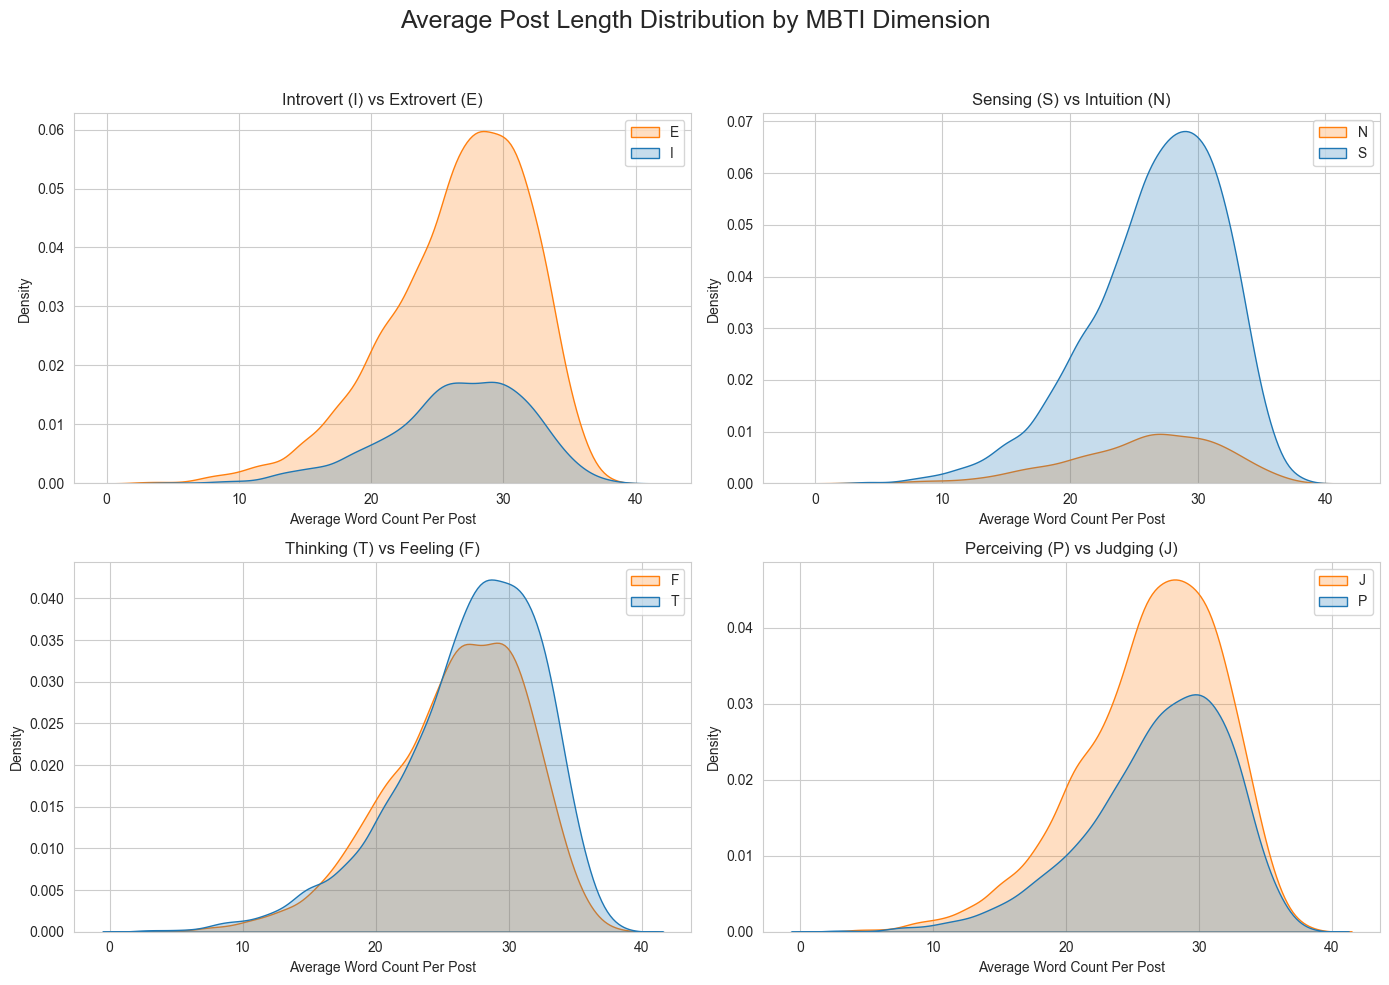

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Average Post Length Distribution by MBTI Dimension', fontsize=18)

# I/E
sns.kdeplot(data=data, x='avg_post_length', hue='I/E', ax=axs[0, 0], fill=True)
axs[0, 0].set_title('Introvert (I) vs Extrovert (E)')
axs[0, 0].legend(labels=['E', 'I'])

# S/N
sns.kdeplot(data=data, x='avg_post_length', hue='S/N', ax=axs[0, 1], fill=True)
axs[0, 1].set_title('Sensing (S) vs Intuition (N)')
axs[0, 1].legend(labels=['N', 'S'])

# T/F
sns.kdeplot(data=data, x='avg_post_length', hue='T/F', ax=axs[1, 0], fill=True)
axs[1, 0].set_title('Thinking (T) vs Feeling (F)')
axs[1, 0].legend(labels=['F', 'T'])

# P/J
sns.kdeplot(data=data, x='avg_post_length', hue='P/J', ax=axs[1, 1], fill=True)
axs[1, 1].set_title('Perceiving (P) vs Judging (J)')
axs[1, 1].legend(labels=['J', 'P'])

# Cleanup
for ax in axs.flat:
    ax.set_xlabel('Average Word Count Per Post')
    ax.set_ylabel('Density')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### Save data to new csv

In [22]:
data[['type', 'cleaned_posts', 'I/E', 'S/N', 'T/F', 'P/J']].to_csv('mbti_cleaned.csv', index=False)

#### Read new CSV file

#### WordCloud

In [4]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter

data = pd.read_csv('./mbti_cleaned.csv')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered = [word for word in words if word.lower() not in stop_words]
    return filtered

# Apply to all posts
data['filtered_words'] = data['cleaned_posts'].apply(remove_stopwords)

In [5]:
# Flatten all words
all_words = sum(data['filtered_words'], [])
global_freq = Counter(all_words)
top5_global_words = [word for word, _ in global_freq.most_common(5)]
print("Top 5 global words to exclude:", top5_global_words)

Top 5 global words to exclude: ['like', 'think', 'people', 'would', 'really']


In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def process_and_plot_dimension(data, dim_col, exclude_words):
    types = data[dim_col].unique()
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f"WordCloud for MBTI Dimension: {dim_col}", fontsize=16)

    for i, typ in enumerate(types):
        subset = data[data[dim_col] == typ]
        all_words = sum(subset['filtered_words'], [])
        filtered_words = [w for w in all_words if w not in exclude_words]
        freq = Counter(filtered_words)
        
        wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(freq)
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].axis('off')
        axes[i].set_title(f"{typ}", fontsize=14)
    
    plt.tight_layout()
    plt.show()

#### Sentimental analysis

In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np

# Load your cleaned data
data = pd.read_csv('mbti_cleaned.csv')

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function: Get average compound score over all posts
def get_avg_sentiment(cleaned_posts):
    if not isinstance(cleaned_posts, str) or '|||' not in cleaned_posts:
        return 0.0  # Fallback

    posts = cleaned_posts.split('|||')
    scores = [analyzer.polarity_scores(p)['compound'] for p in posts if p.strip()]
    
    return np.mean(scores) if scores else 0.0

# Apply the function row-wise
print("Calculating sentiment score per post...")
data['sentiment_score'] = data['cleaned_posts'].apply(get_avg_sentiment)
print("Done.")

Calculating sentiment score per post...
Done.


In [2]:
# I/E
avg_ie = data.groupby('I/E')['sentiment_score'].mean()
print(f"Sentiment - Extrovert (E): {avg_ie[False]:.3f}, Introvert (I): {avg_ie[True]:.3f}")

# S/N
avg_sn = data.groupby('S/N')['sentiment_score'].mean()
print(f"Sentiment - Intuition (N): {avg_sn[False]:.3f}, Sensing (S): {avg_sn[True]:.3f}")

# T/F
avg_tf = data.groupby('T/F')['sentiment_score'].mean()
print(f"Sentiment - Feeling (F): {avg_tf[False]:.3f}, Thinking (T): {avg_tf[True]:.3f}")

# P/J
avg_pj = data.groupby('P/J')['sentiment_score'].mean()
print(f"Sentiment - Judging (J): {avg_pj[False]:.3f}, Perceiving (P): {avg_pj[True]:.3f}")


Sentiment - Extrovert (E): 0.241, Introvert (I): 0.208
Sentiment - Intuition (N): 0.216, Sensing (S): 0.213
Sentiment - Feeling (F): 0.245, Thinking (T): 0.181
Sentiment - Judging (J): 0.220, Perceiving (P): 0.213


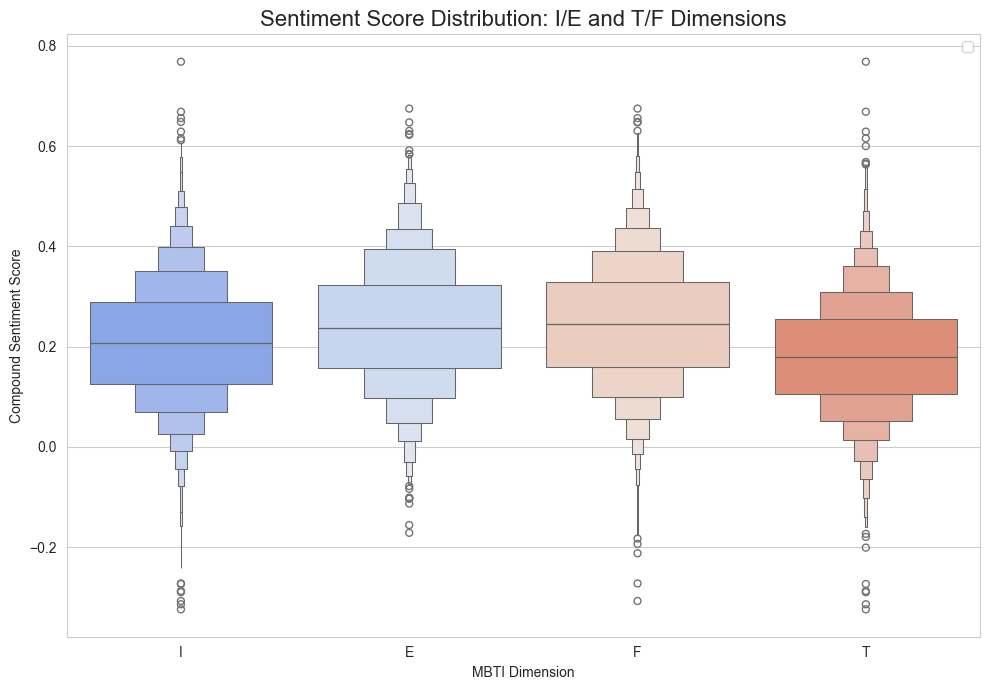

In [31]:
import pandas as pd

# Melt the MBTI dimension columns into a long format
subset_df = pd.melt(
    data,
    id_vars=['sentiment_score'],
    value_vars=['I/E', 'T/F'],
    var_name='Dimension',
    value_name='Trait'
)

# Map True/False to trait letters
trait_map = {
    'I/E': {True: 'I', False: 'E'},
    'T/F': {True: 'T', False: 'F'}
}

subset_df['Trait'] = subset_df.apply(lambda row: trait_map[row['Dimension']][row['Trait']], axis=1)

subset_df.head()

plt.figure(figsize=(10, 7))
sns.boxenplot(x='Trait', y='sentiment_score', hue='Trait', data=subset_df, palette="coolwarm")

plt.title('Sentiment Score Distribution: I/E and T/F Dimensions', fontsize=16)
plt.xlabel('MBTI Dimension')
plt.ylabel('Compound Sentiment Score')
plt.legend()
plt.tight_layout()
plt.show()


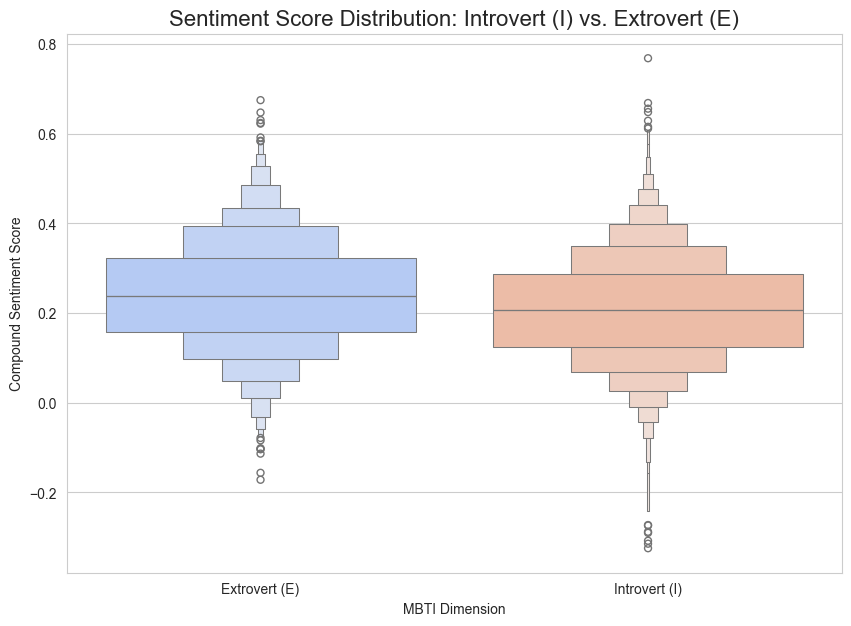

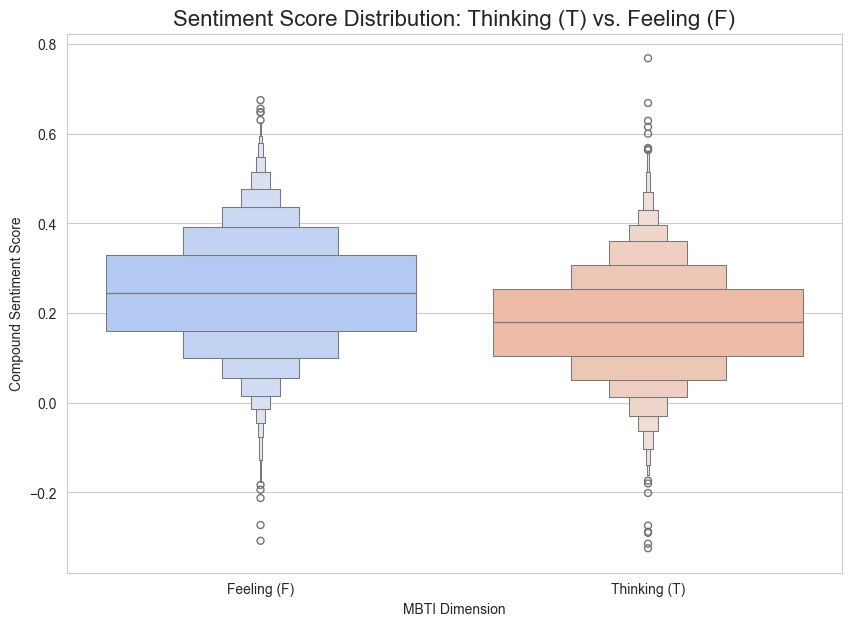

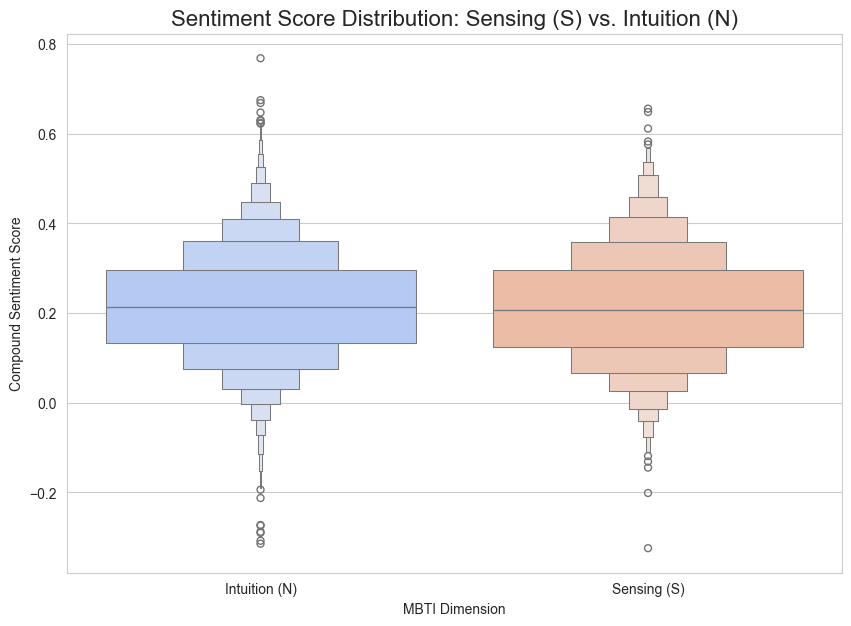

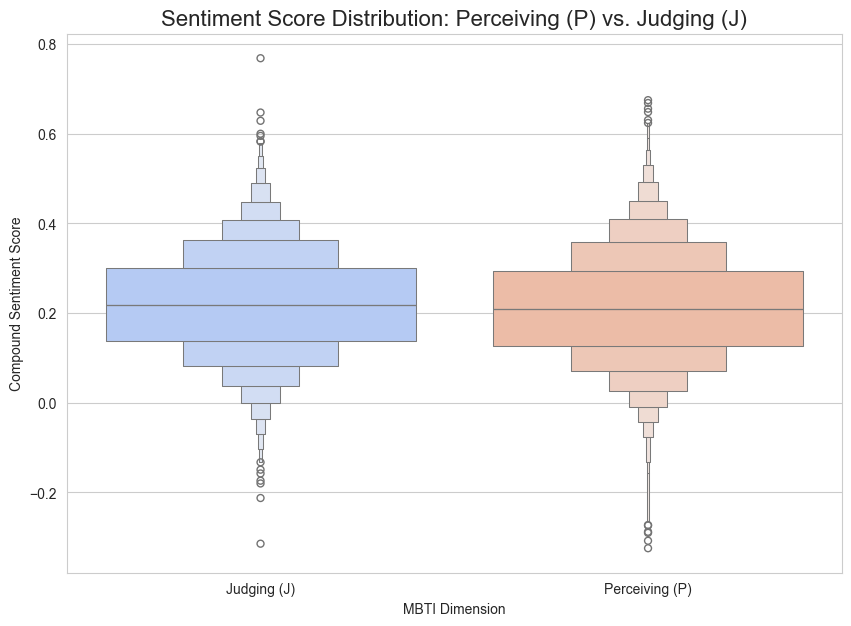

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.boxenplot(x='I/E', y='sentiment_score', data=data, palette="coolwarm")
plt.title('Sentiment Score Distribution: Introvert (I) vs. Extrovert (E)', fontsize=16)
plt.xticks(ticks=[True, False], labels=['Introvert (I)', 'Extrovert (E)'])
plt.xlabel('MBTI Dimension')
plt.ylabel('Compound Sentiment Score')
plt.show()

plt.figure(figsize=(10, 7))
sns.boxenplot(x='T/F', y='sentiment_score', data=data, palette="coolwarm")
plt.title('Sentiment Score Distribution: Thinking (T) vs. Feeling (F)', fontsize=16)
plt.xticks(ticks=[True, False], labels=['Thinking (T)', 'Feeling (F)'])
plt.xlabel('MBTI Dimension')
plt.ylabel('Compound Sentiment Score')
plt.show()

plt.figure(figsize=(10, 7))
sns.boxenplot(x='S/N', y='sentiment_score', data=data, palette="coolwarm")
plt.title('Sentiment Score Distribution: Sensing (S) vs. Intuition (N)', fontsize=16)
plt.xticks(ticks=[True, False], labels=['Sensing (S)', 'Intuition (N)'])
plt.xlabel('MBTI Dimension')
plt.ylabel('Compound Sentiment Score')
plt.show()

plt.figure(figsize=(10, 7))
sns.boxenplot(x='P/J', y='sentiment_score', data=data, palette="coolwarm")
plt.title('Sentiment Score Distribution: Perceiving (P) vs. Judging (J)', fontsize=16)
plt.xticks(ticks=[True, False], labels=['Perceiving (P)', 'Judging (J)'])
plt.xlabel('MBTI Dimension')
plt.ylabel('Compound Sentiment Score')
plt.show()